In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mean_1 = np.array([0, 0])
cov_1 = np.array([[1, 0], [0, 1]])

mean_2 = np.array([4, 3])
cov_2 = np.array([[0.9, 0.5], [0.1, 0.8]])

dist_1 = np.random.multivariate_normal(mean_1, cov_1, 1000)
dist_2 = np.random.multivariate_normal(mean_2, cov_2, 1000)
print dist_1.shape
print dist_2.shape

(1000, 2)
(1000, 2)


/home/devashish/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


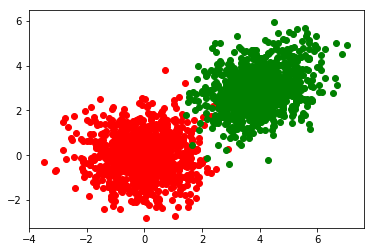

In [3]:

plt.figure(0)
plt.scatter(dist_1[:, 0], dist_1[:, 1], color='red')
plt.scatter(dist_2[:, 0], dist_2[:, 1], color='green')
plt.show()

In [4]:
N_pts = dist_1.shape[0] + dist_2.shape[0]
data = np.zeros((N_pts, dist_1.shape[1]))
print data.shape
labels = np.zeros((N_pts,))
print labels.shape

(2000, 2)
(2000,)


In [5]:

data[:1000, :] = dist_1
data[1000:, :] = dist_2

labels[:1000] = 0
labels[1000:] = 1

In [6]:
def dist(a, b):
    # assuming a and b are ndarrays
    return np.sqrt(((b-a)**2).sum())

print dist(np.array([0, 0]), np.array([1, 1]))

1.41421356237


In [7]:
def knn(X_train, labels, X_test, k=5):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    
    test_lab = []
    
    for iy in range(n_test):
        distances = []
        for ix in range(n_train):
            d = dist(X_train[ix], X_test[iy])
            distances.append([d, labels[ix]])
        dist_sort = sorted(distances)
        k_neighbours = np.asarray(dist_sort)[:k]
        unique, neighbours = np.unique(k_neighbours[:, 1], return_counts=True)
        f = dict(zip(unique, neighbours))
        print f
        test_lab.append(f)
        print '-----------------------'
    return test_lab


In [8]:
test_pt = np.array([[4, 0], [1, 4]])
pred = knn(data, labels, test_pt, k=7)
print pred

{1.0: 7}
-----------------------
{0.0: 2, 1.0: 5}
-----------------------
[{1.0: 7}, {0.0: 2, 1.0: 5}]
